In [1]:
import gemmi
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scipy.signal
import sys
sys.path.append('/Users/DWMoreau/MLI')

from Utilities import Q2Calculator
from EntryHelpers import verify_unit_cell_consistency_by_bravais_lattice
from EntryHelpers import get_unit_cell_volume
from EntryHelpers import spacegroup_to_symmetry
from Reindexing import hexagonal_to_rhombohedral_unit_cell
from Reindexing import hexagonal_to_rhombohedral_hkl
from Reindexing import reindex_entry_monoclinic
from Reindexing import reindex_entry_orthorhombic
from Reindexing import reindex_entry_triclinic


In [2]:
def process_dif_file(dif_file_name):
    unit_cell = np.zeros(6)
    with open(dif_file_name, 'r') as dif_file:
        read_peaks = False
        peaks = []
        for line in dif_file:
            if 'CELL PARAMETERS:' in line:
                index = 0
                for element in line[:-1].split('CELL PARAMETERS:')[1].split(' '):
                    if element != '':
                        unit_cell[index] = float(element)
                        index += 1
            if 'SPACE GROUP:' in line:
                spacegroup_symbol = line[:-1].split('SPACE GROUP:')[1].replace(' ', '')
            if 'X-RAY WAVELENGTH:' in line:
                wavelength = float(line[:-1].split('X-RAY WAVELENGTH:')[1])
            if read_peaks and (line.startswith('====') or 'Copyright' in line):
                read_peaks = False
            if read_peaks:
                index = 0
                values = np.zeros(6)
                for element in line[:-1].split(' '):
                    if element != '':
                        values[index] = float(element)
                        index += 1
                peaks.append(values)
            if '2-THETA      INTENSITY    D-SPACING' in line:
                read_peaks = True
    peaks = np.row_stack(peaks)
    if spacegroup_symbol == 'P2_1/b':
        spacegroup_symbol = 'P 1 1 21/b'
    elif spacegroup_symbol == 'P2_1/n':
        spacegroup_symbol = 'P 1 21/n 1'
    elif spacegroup_symbol == 'P2_1/m':
        spacegroup_symbol = 'P 1 21/m 1'
    elif spacegroup_symbol == 'Pa3':
        spacegroup_symbol = 'Pa-3'
    elif spacegroup_symbol == 'Fd3m':
        spacegroup_symbol = 'Fd-3m'
    elif spacegroup_symbol == 'P2_1/a':
        spacegroup_symbol = 'P 1 21/a 1'
    elif spacegroup_symbol == 'P2_1/c':
        spacegroup_symbol = 'P 1 21/c 1'
    elif spacegroup_symbol == 'P2_1':
        spacegroup_symbol = 'P 1 21 1'
    elif spacegroup_symbol == 'Fm3m':
        spacegroup_symbol = 'Fm-3m'
    elif spacegroup_symbol == 'Pn3':
        spacegroup_symbol = 'Pn-3'
    elif spacegroup_symbol == 'Ia3':
        spacegroup_symbol = 'Ia-3'
    elif spacegroup_symbol == 'Ia3d':
        spacegroup_symbol = 'Ia-3d'
    elif spacegroup_symbol == 'Pn3m':
        spacegroup_symbol = 'Pn-3m'
    elif spacegroup_symbol == 'B2_1':
        spacegroup_symbol = 'B 2 21 2'
    return unit_cell, spacegroup_symbol, wavelength, peaks


In [3]:
RRUFF_directory = '/Users/DWMoreau/MLI/data/RRUFF'
sample_names = []
for sample_name in os.listdir(RRUFF_directory):
    if sample_name.startswith('D0'):
        sample_names.append(sample_name)
    elif sample_name.startswith('R0'): 
        sample_names.append(sample_name)
    elif sample_name.startswith('R1'): 
        sample_names.append(sample_name)
    elif sample_name.startswith('R2'): 
        sample_names.append(sample_name)
sample_names.sort()
print(len(sample_names))

1303


R040019 17
[[ 9.8859     18.0004      5.2731      1.82601582]]
monoclinic
<gemmi.SpaceGroup("I 1 2/m 1")>
Unit cell BL consistent: True
Consistent diffraction: True
[ 9.8859     18.0004      5.2731      1.57079633  1.82601582  1.57079633]


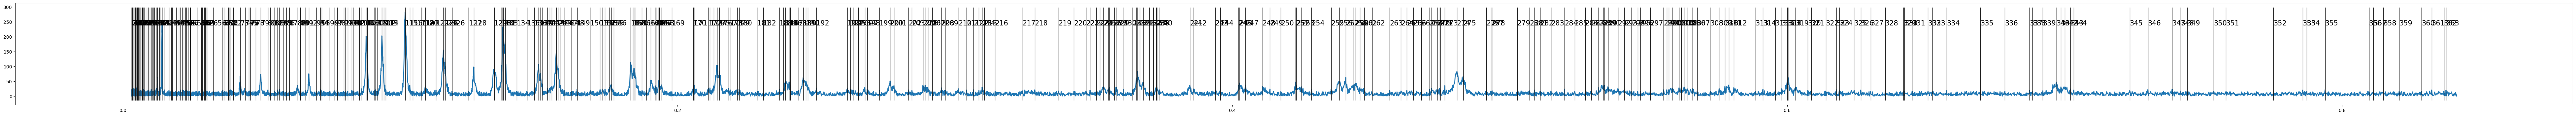

Good Prominence: y/n n


Current Prominence: 0.05


Provide Prominence 0.1


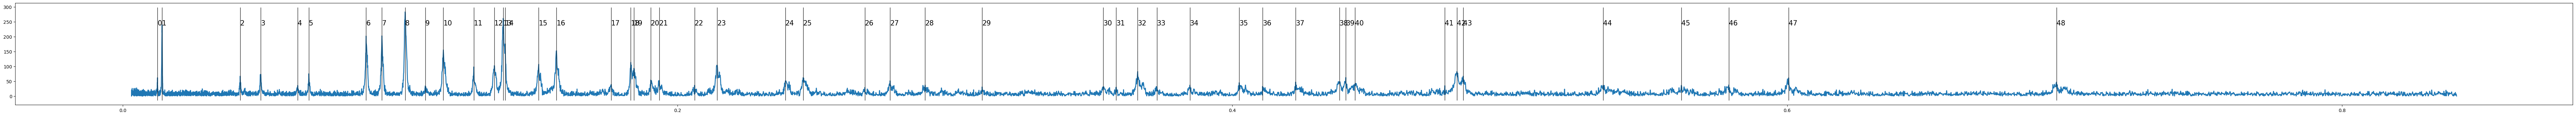

Good Prominence: y/n 0, 1, 2, 3, 4, 5, 6, 7,8,9,10,11,12,13,15,16,17,18,20,21,22,23,24,25,27,32,35,38, 40, 42,47
Select Peaks 0, 1, 2, 3, 4, 5, 6, 7,8,9,10,11,12,13,15,16,17,18,20,21,22,23,24,25,27,32,35,38, 40, 42,47


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 27, 32, 35, 38, 40, 42, 47]


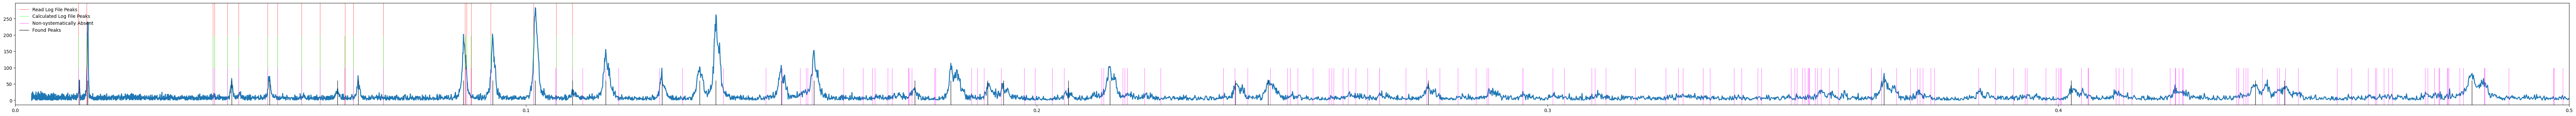

R040020 18
[[14.7472     13.066       7.5574      1.95546689]]
monoclinic
<gemmi.SpaceGroup("C 1 2/m 1")>
Unit cell BL consistent: True
Consistent diffraction: True
[14.7472     13.066       7.5574      1.57079633  1.95546689  1.57079633]


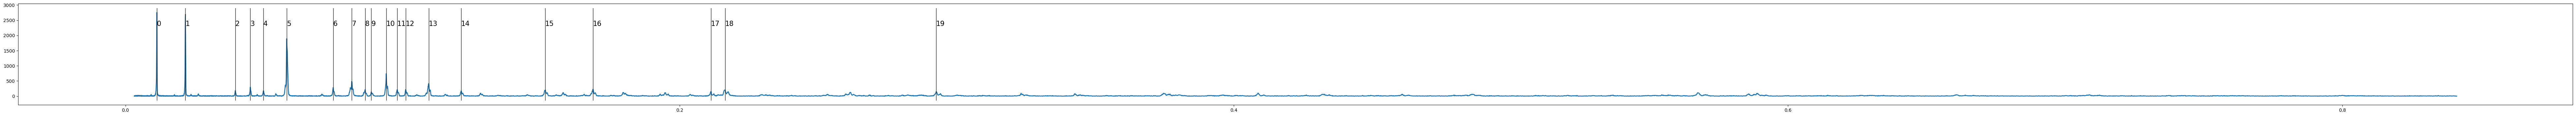

Good Prominence: y/n n


Current Prominence: 0.05


Provide Prominence 0.3


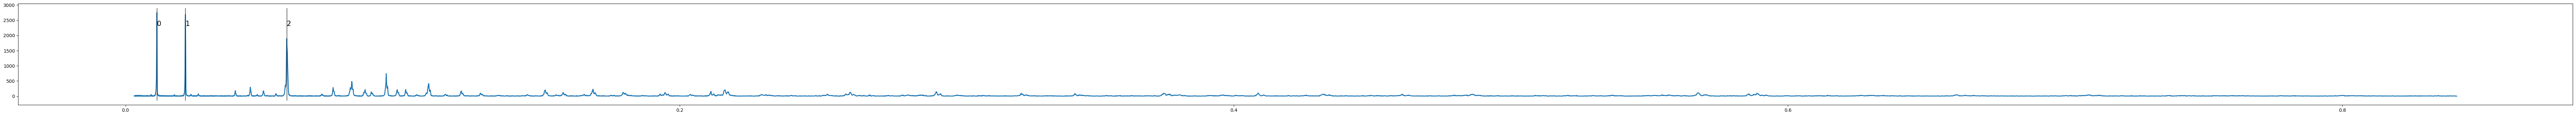

Good Prominence: y/n n


Current Prominence: 0.3


Provide Prominence 0.03


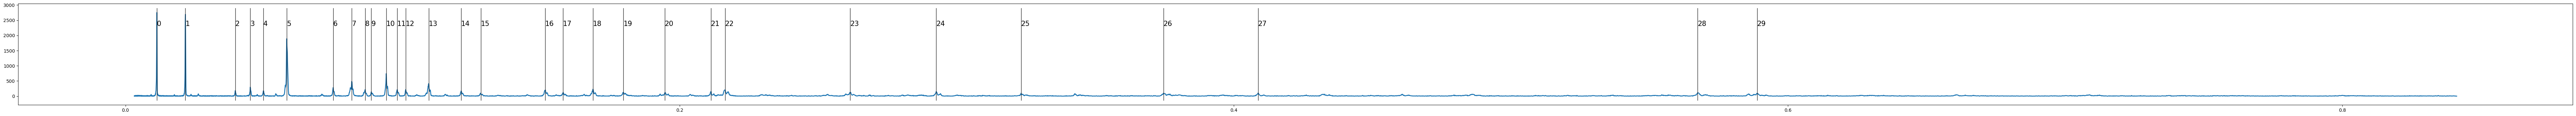

Good Prominence: y/n y
Select Peaks 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,20, 21, 22,23, 24,25,26,27,28


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]


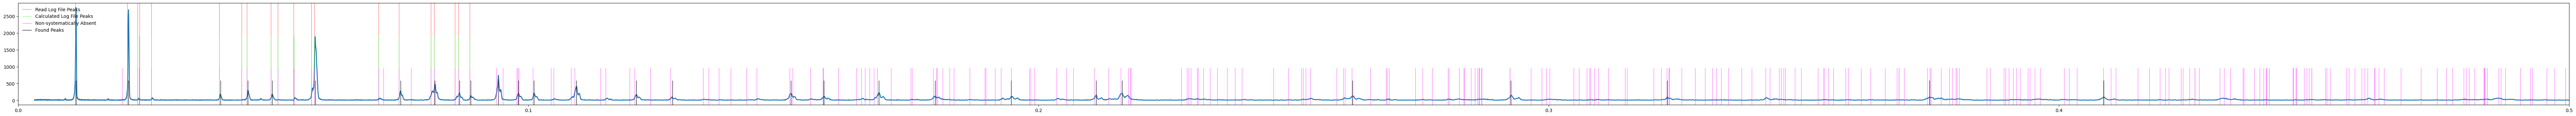

R040021 19
[[17.742      17.852       7.4293      2.03261045]]
monoclinic
<gemmi.SpaceGroup("C 1 2/m 1")>
Unit cell BL consistent: True
Consistent diffraction: True
[17.742      17.852       7.4293      1.57079633  2.03261045  1.57079633]


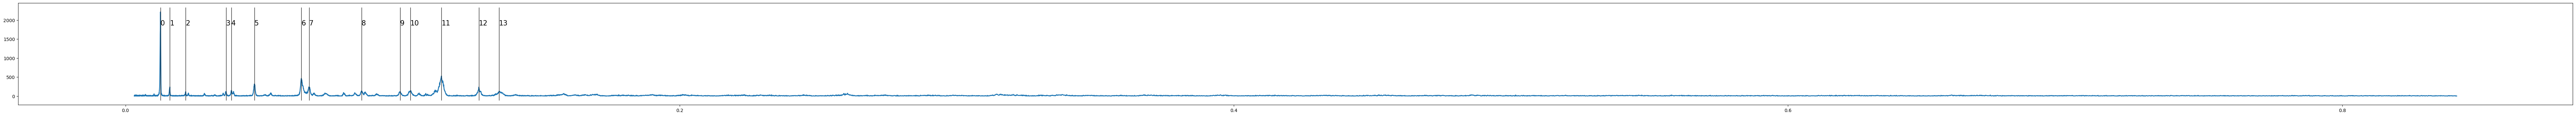

Good Prominence: y/n n


Current Prominence: 0.05


Provide Prominence 0.03


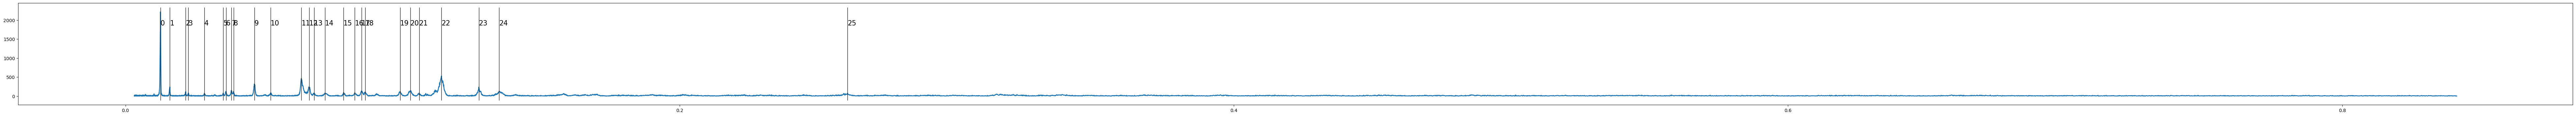

Good Prominence: y/n y
Select Peaks 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


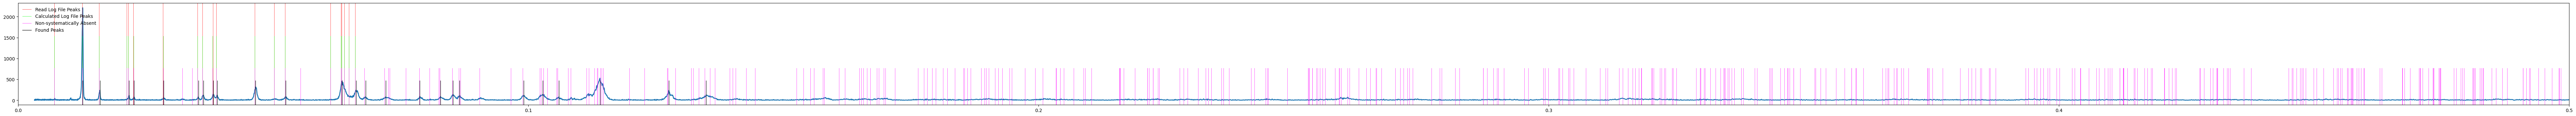

R040022 20
orthorhombic
<gemmi.SpaceGroup("F d d 2")>
Unit cell BL consistent: True
Consistent diffraction: True
[18.2955     18.6353      6.5813      1.57079633  1.57079633  1.57079633]


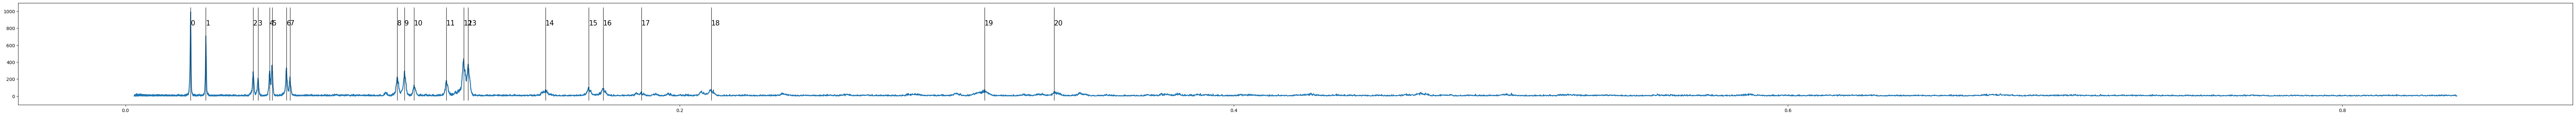

Good Prominence: y/n y
Select Peaks 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,19, 20


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


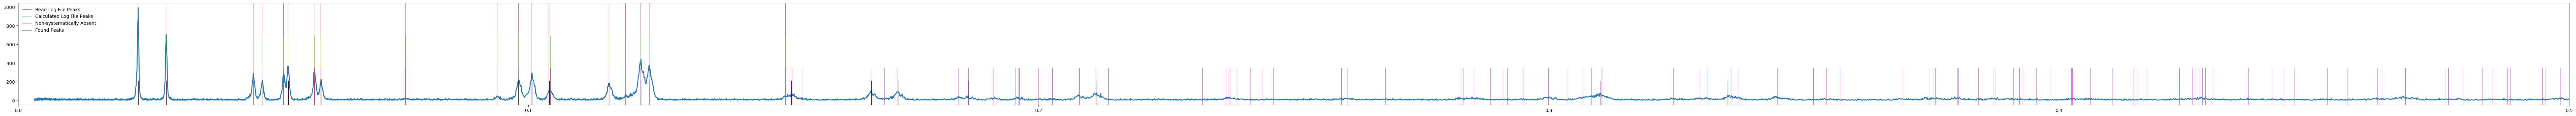

R040023 21
R040024 22
rhombohedral
<gemmi.SpaceGroup("R -3 c:H")>
Unit cell BL consistent: True
Consistent diffraction: True
[5.42484302 5.42484302 5.42484302 0.96472898 0.96472898 0.96472898]


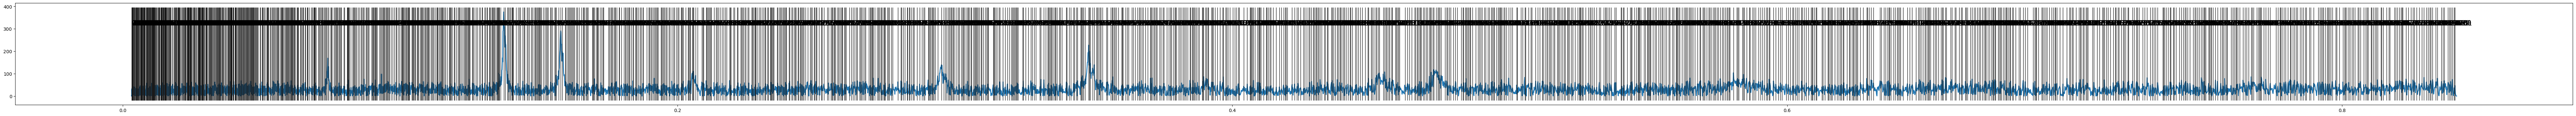

Good Prominence: y/n n


Current Prominence: 0.05


Provide Prominence 0.1


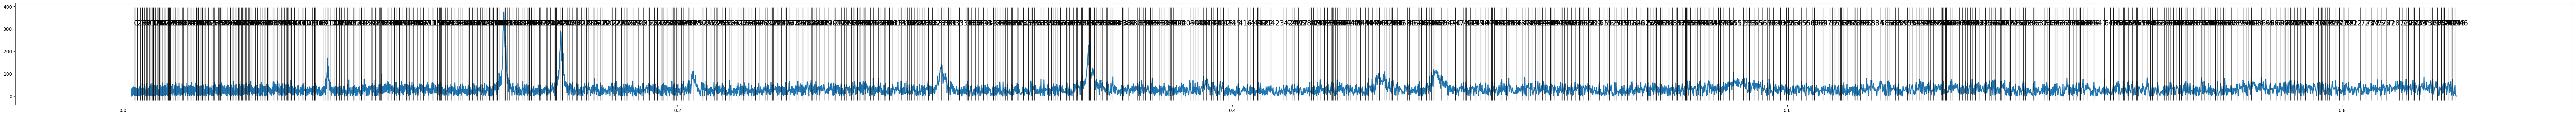

Good Prominence: y/n n


Current Prominence: 0.1


Provide Prominence 0.2


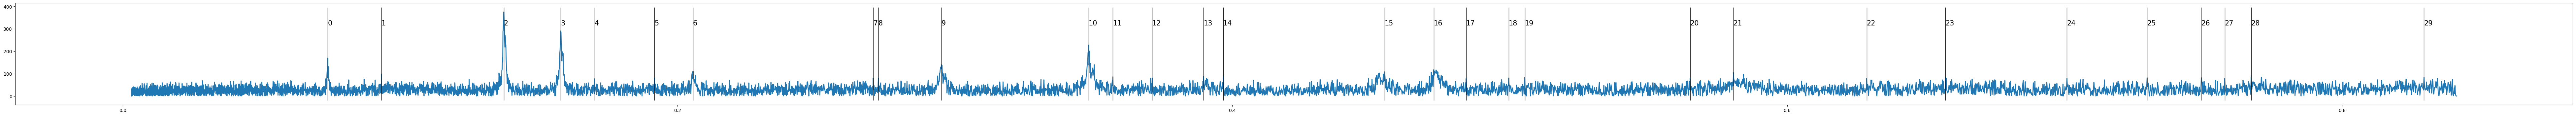

Good Prominence: y/n y
Select Peaks 0, 2, 3, 6, 9, 10,16


[0, 2, 3, 6, 9, 10, 16]


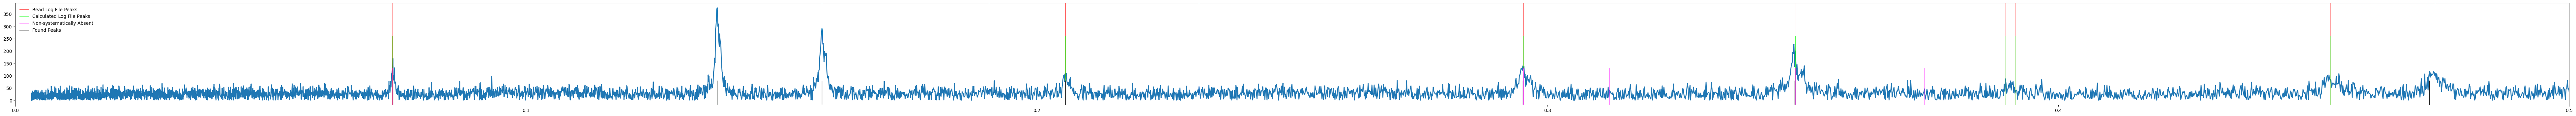

R040025 23
hexagonal
<gemmi.SpaceGroup("P 63")>
Unit cell BL consistent: True
Consistent diffraction: True
[10.0011     10.0011      8.3855      1.57079633  1.57079633  2.0943951 ]


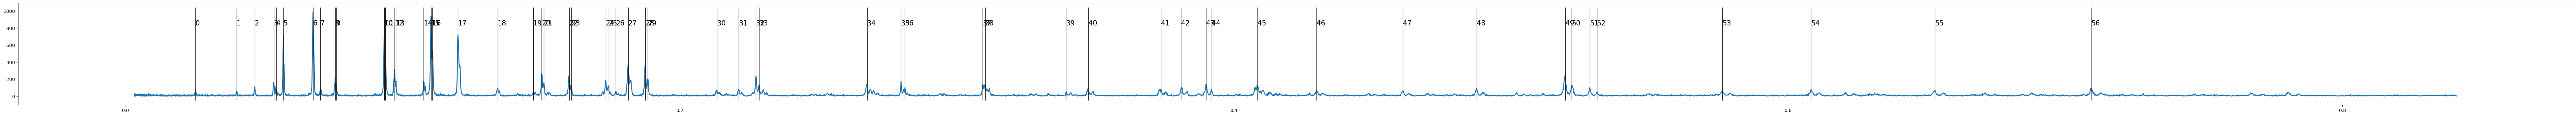

Good Prominence: y/n y
Select Peaks 0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 14, 15, 17, 18,20, 22, 24, 27, 28, 30, 31, 32, 34, 35


[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 14, 15, 17, 18, 20, 22, 24, 27, 28, 30, 31, 32, 34, 35]


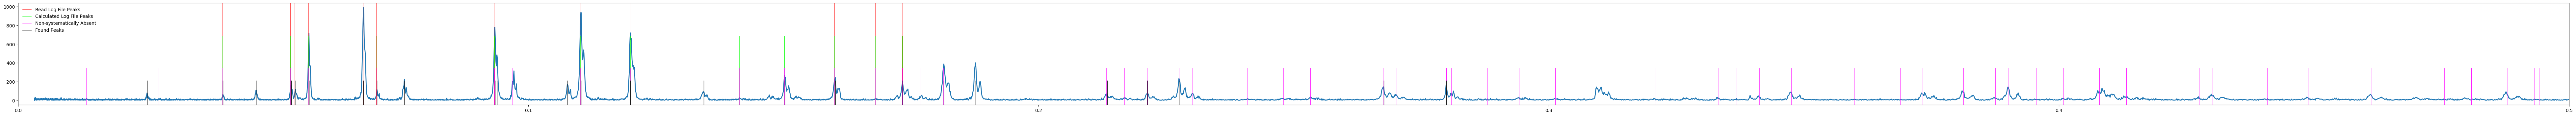

R040026 24
tetragonal
<gemmi.SpaceGroup("P -4 21 m")>
Unit cell BL consistent: True
Consistent diffraction: True
[7.8277     7.8277     5.018      1.57079633 1.57079633 1.57079633]


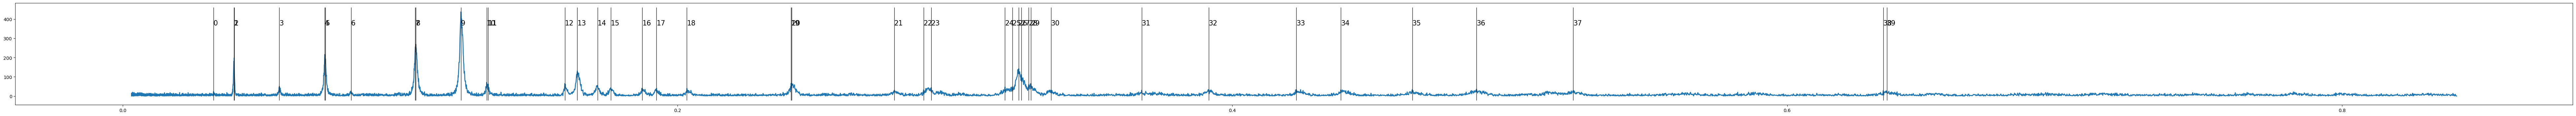

Good Prominence: y/n n


Current Prominence: 0.05


Provide Prominence 0.07


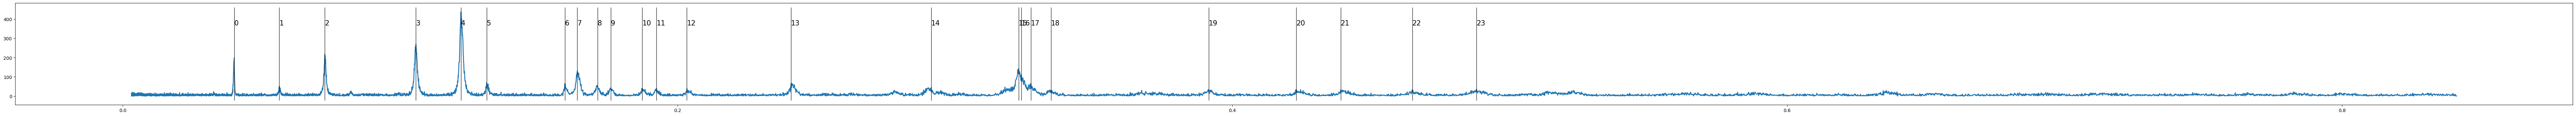

Good Prominence: y/n n


Current Prominence: 0.07


Provide Prominence 0.06


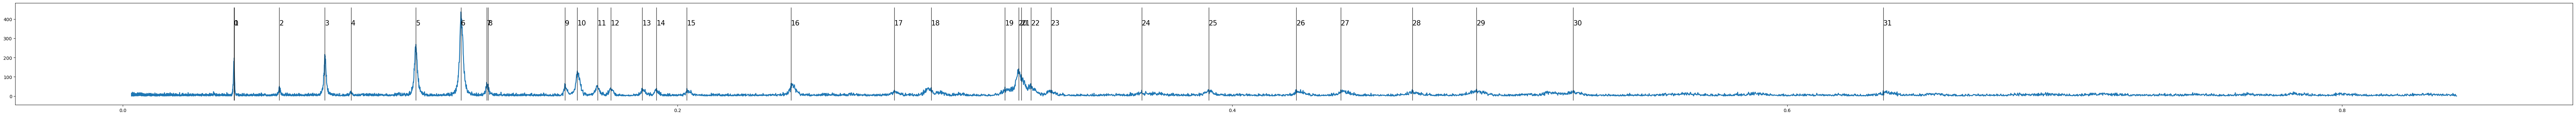

Good Prominence: y/n y
Select Peaks 0, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 16, 17, 20,25, 28


[0, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 16, 17, 20, 25, 28]


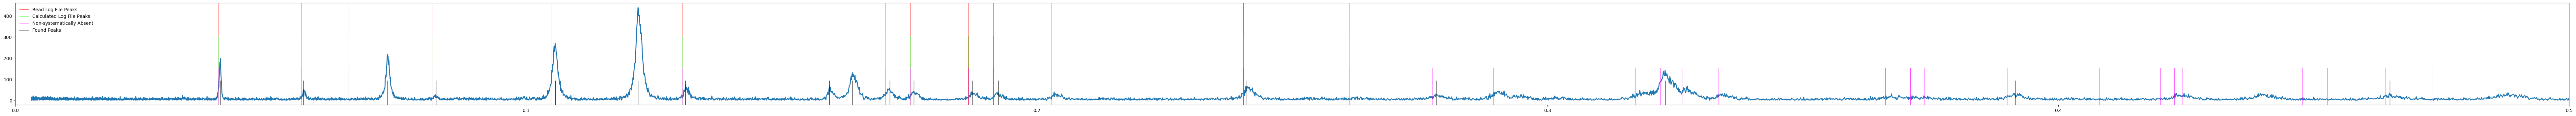

R040027 25
cubic
<gemmi.SpaceGroup("F d -3 m:1")>
Unit cell BL consistent: True
Consistent diffraction: True
[8.0988     8.0988     8.0988     1.57079633 1.57079633 1.57079633]


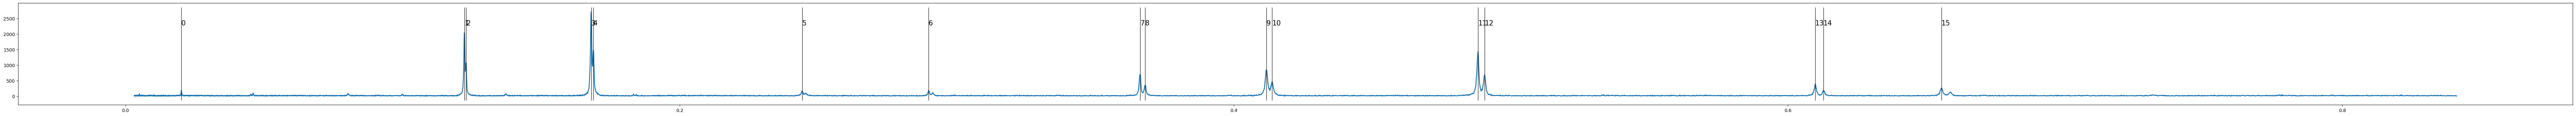

Good Prominence: y/n y
Select Peaks 1, 3, 5, 6, 7, 9, 11,13, 15


[1, 3, 5, 6, 7, 9, 11, 13, 15]


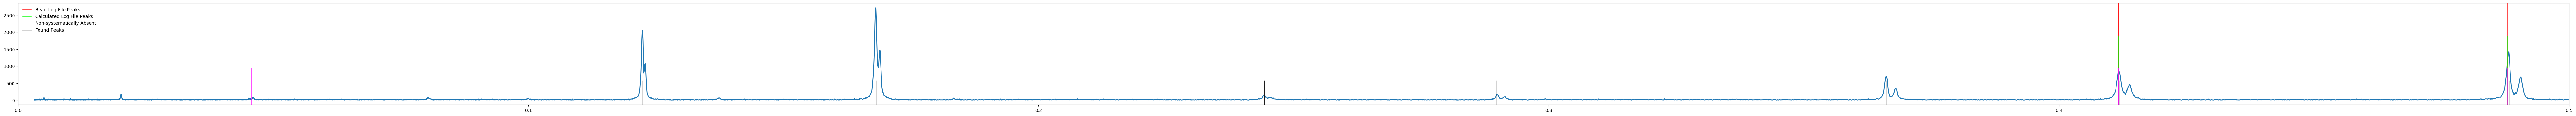

R040028 26
rhombohedral
<gemmi.SpaceGroup("R -3:H")>
Unit cell BL consistent: True
Consistent diffraction: True
[8.80591375 8.80591375 8.80591375 1.94966758 1.94966758 1.94966758]


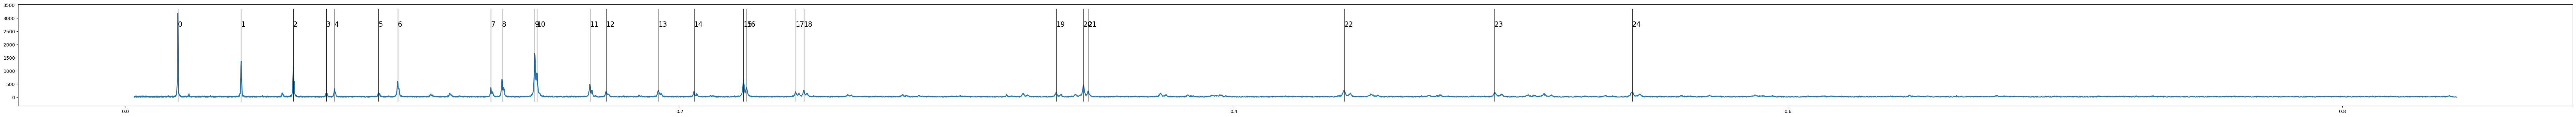

Good Prominence: y/n n


Current Prominence: 0.05


Provide Prominence 0.03


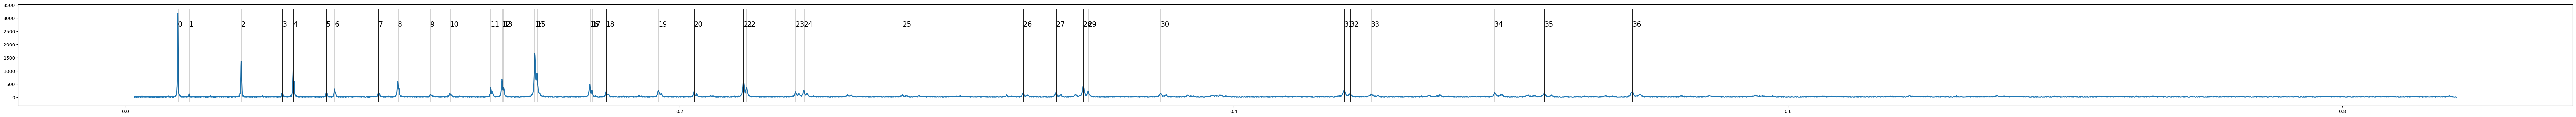

Good Prominence: y/n y
Select Peaks 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14,16,18, 19, 20, 21, 23, 24, 26, 27, 28, 30,32,33,34, 36


[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 16, 18, 19, 20, 21, 23, 24, 26, 27, 28, 30, 32, 33, 34, 36]


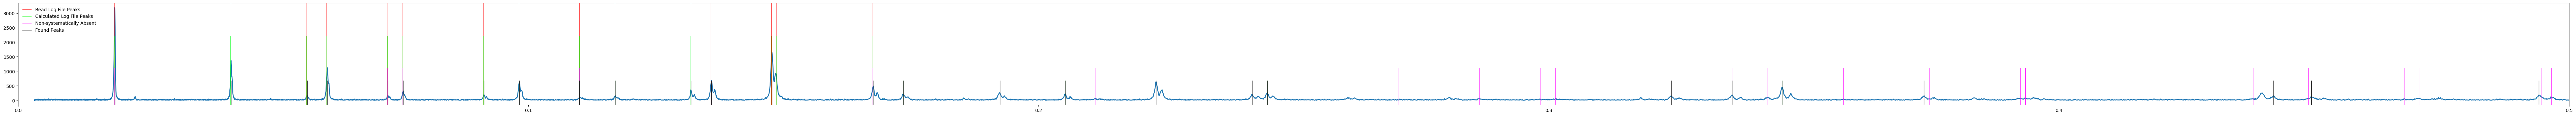

R040029 27
[[ 5.674      15.1049      6.4909      2.06844206]]
monoclinic
<gemmi.SpaceGroup("I 1 2/a 1")>
Unit cell BL consistent: True
Consistent diffraction: False
[ 5.674      15.1049      6.4909      1.57079633  2.06844206  1.57079633]

R040030 28
rhombohedral
<gemmi.SpaceGroup("R -3:H")>
Unit cell BL consistent: True
Consistent diffraction: True
[6.01515669 6.01515669 6.01515669 0.82226732 0.82226732 0.82226732]


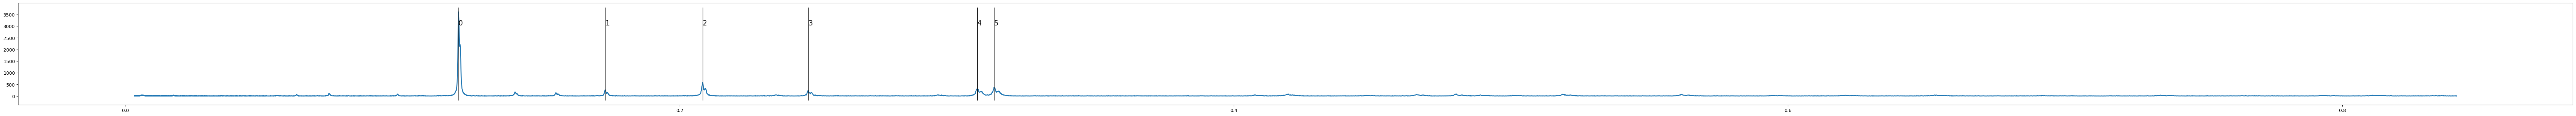

In [ ]:
starting_index = 27
for sample_index, sample_name in enumerate(sample_names[starting_index:]):
    print(f'{sample_name} {sample_index + starting_index}')
    directory_name = os.path.join(RRUFF_directory, sample_name)
    dif_file_name = None
    processed_file_name = None
    for file_name in os.listdir(directory_name):
        if 'DIF_File' in file_name:
            dif_file_name = os.path.join(directory_name, file_name)
        elif 'Processed' in file_name:
            processed_file_name = os.path.join(directory_name, file_name)
    if dif_file_name and processed_file_name:
        unit_cell_degrees, spacegroup_symbol, wavelength, peaks = process_dif_file(dif_file_name)
        unit_cell = unit_cell_degrees.copy()
        unit_cell[3:] *= np.pi/180
        volume = get_unit_cell_volume(unit_cell_degrees)
        gemmi_spacegroup = gemmi.SpaceGroup(spacegroup_symbol)
        spacegroup_number = gemmi_spacegroup.number
        spacegroup_symbol_hm = gemmi_spacegroup.hm
        spacegroup_symbol_hall = gemmi_spacegroup.hall
        bravais_lattice, _, crystal_system, lattice_system = spacegroup_to_symmetry(spacegroup_number)
        crystal_system = gemmi_spacegroup.crystal_system_str()
        consistent_unit_cell = verify_unit_cell_consistency_by_bravais_lattice(
            bravais_lattice=bravais_lattice, unit_cell=unit_cell_degrees,
            )
        gemmi_cell = gemmi.UnitCell(*unit_cell_degrees)

        if lattice_system == 'cubic':
            uc = unit_cell[[0]][np.newaxis]
            reindexed_unit_cell = unit_cell
            reindexed_volume = volume
            reindexed_spacegroup_symbol_hm = spacegroup_symbol_hm
        elif lattice_system == 'hexagonal':
            uc = unit_cell[[0, 2]][np.newaxis]
            reindexed_unit_cell = unit_cell
            reindexed_volume = volume
            reindexed_spacegroup_symbol_hm = spacegroup_symbol_hm
        elif lattice_system == 'monoclinic':
            uc = unit_cell[[0, 1, 2, 4]][np.newaxis]
            print(uc)
            reindexed_unit_cell_degrees, reindexed_spacegroup_symbol_hm, _ = \
                reindex_entry_monoclinic(unit_cell_degrees, spacegroup_symbol_hm, radians=False)
            if reindexed_unit_cell_degrees is None:
                continue
            reindexed_unit_cell = reindexed_unit_cell_degrees.copy()
            reindexed_unit_cell[3:] *= np.pi/180
            reindexed_volume = get_unit_cell_volume(reindexed_unit_cell_degrees)
        elif lattice_system == 'orthorhombic':
            uc = unit_cell[[0, 1, 2]][np.newaxis]
            reindexed_spacegroup_symbol_hm, _, reindexed_unit_cell, _ = \
                reindex_entry_orthorhombic(unit_cell, gemmi_spacegroup.hm, gemmi_spacegroup.number)
            reindexed_volume = volume
        elif lattice_system == 'rhombohedral':
            if np.all(unit_cell_degrees[3:] == [90, 90, 120]):
                unit_cell_degrees, _ = hexagonal_to_rhombohedral_unit_cell(unit_cell_degrees, radians=False)
                unit_cell = unit_cell_degrees.copy()
                unit_cell[3:] *= np.pi/180
                uc = unit_cell[[0, 3]][np.newaxis]
                peaks[:, 3:] = hexagonal_to_rhombohedral_hkl(peaks[:, 3:])
                reindexed_unit_cell_degrees = unit_cell_degrees.copy()
            else:
                reindexed_unit_cell_degrees = unit_cell_degrees
            reindexed_unit_cell = reindexed_unit_cell_degrees.copy()
            reindexed_unit_cell[3:] *= np.pi/180
            reindexed_volume = get_unit_cell_volume(reindexed_unit_cell_degrees)
            reindexed_spacegroup_symbol_hm = spacegroup_symbol_hm
        elif lattice_system == 'tetragonal':
            uc = unit_cell[[0, 2]][np.newaxis]
            reindexed_unit_cell = unit_cell
            reindexed_volume = volume
            reindexed_spacegroup_symbol_hm = spacegroup_symbol_hm
        elif lattice_system == 'triclinic':
            uc = unit_cell[np.newaxis].copy()
            reindexed_unit_cell_degrees, _ = reindex_entry_triclinic(unit_cell_degrees, radians=False)
            reindexed_unit_cell = reindexed_unit_cell_degrees.copy()
            reindexed_unit_cell[3:] *= np.pi/180
            reindexed_volume = get_unit_cell_volume(reindexed_unit_cell_degrees)
            reindexed_spacegroup_symbol_hm = spacegroup_symbol_hm
        reindexed_spacegroup_symbol_hall = gemmi.SpaceGroup(reindexed_spacegroup_symbol_hm).hall

        pattern = np.loadtxt(processed_file_name, comments='#', delimiter=',')
        resolution = wavelength / (2 * np.sin(pattern[:, 0] / 2 * np.pi/180))
        q2_pattern = 1 / resolution**2
        I = pattern[:, 1]
        
        d_spacing = wavelength / (2 * np.sin(peaks[:, 0] / 2 * np.pi/180))
        q2_peaks = 1 / d_spacing**2

        hkl_sa = gemmi.make_miller_array(gemmi_cell, gemmi_spacegroup, 0.95*d_spacing[-1], 100, True)

        q2_calc = Q2Calculator(
            lattice_system=lattice_system,
            hkl=peaks[:, 3:],
            tensorflow=False,
            representation='unit_cell',
            ).get_q2(uc)[0]

        q2_sa = Q2Calculator(
            lattice_system=lattice_system,
            hkl=hkl_sa,
            tensorflow=False,
            representation='unit_cell',
            ).get_q2(uc)[0]

        consistent_peaks = np.all(np.isclose(q2_calc, q2_peaks, atol=0.0001))
        print(lattice_system)
        print(gemmi_spacegroup)
        print(f'Unit cell BL consistent: {consistent_unit_cell}')
        print(f'Consistent diffraction: {consistent_peaks}')
        print(unit_cell)
        if not consistent_peaks:
            print()
            continue

        status = 'n'
        prominence = 0.05
        while status == 'n':
            found_indices, _ = scipy.signal.find_peaks(I, prominence=prominence*I.max())
            q2_found = q2_pattern[found_indices]
            fig, axes = plt.subplots(1, 1, figsize=(100, 4))
            axes.plot(q2_pattern, I, linewidth=2, zorder=1)
            ylim = axes.get_ylim()
            for index in range(q2_found.size):
                axes.plot(
                    [q2_found[index], q2_found[index]], [ylim[0], ylim[1]],
                    color=0.1*np.ones(3), linewidth=1, zorder=2,
                    )
                axes.annotate(f'{index}', xy=(q2_found[index], 0.8*ylim[1]), fontsize=15)
            axes.set_ylim()
            plt.show()
            status = input('Good Prominence: y/n')
            if status != 'n':
                selected_indices = [int(p) for p in input('Select Peaks').split(',')]
                print(selected_indices)
                q2_found = q2_found[selected_indices]
            else:
                print(f'Current Prominence: {prominence}')
                prominence = float(input('Provide Prominence'))

        fig, axes = plt.subplots(1, 1, figsize=(100, 4))
        axes.plot(q2_pattern, I, linewidth=2, zorder=1)
        ylim = axes.get_ylim()
        n_peaks = min(peaks.shape[0], 20)
        for index in range(n_peaks):
            if index == 0:
                label0 = 'Read Log File Peaks'
                label1 = 'Calculated Log File Peaks'
            else:
                label0 = None
                label1 = None
            axes.plot(
                [q2_peaks[index], q2_peaks[index]], ylim,
                color=[1, 0, 0], linewidth=0.5, zorder=2,
                label=label0
                )
            axes.plot(
                [q2_calc[index], q2_calc[index]], [ylim[0], 0.66*ylim[1]],
                color=[0, 1, 0], linewidth=0.5, zorder=2,
                label=label1
                )
        for index in range(q2_sa.size):
            if index == 0:
                label = 'Non-systematically Absent'
            else:
                label = None
            axes.plot(
                [q2_sa[index], q2_sa[index]], [ylim[0], 0.33*ylim[1]],
                color=[1, 0, 1], linewidth=0.5, zorder=2,
                label=label,
                )

        for index in range(q2_found.size):
            if index == 0:
                label = 'Found Peaks'
            else:
                label = None
            axes.plot(
                [q2_found[index], q2_found[index]], [ylim[0], 0.2*ylim[1]],
                color=0.1*np.ones(3), linewidth=1, zorder=2,
                label=label,
                )
        axes.set_ylim(ylim)
        axes.set_xlim([0, 0.5])
        axes.legend(frameon=False, loc='upper left')
        plt.show()

        info = {
            'name': sample_name,
            'wavelength': wavelength,
            'spacegroup_number': spacegroup_number,
            'bravais_lattice': bravais_lattice,
            'crystal_system': crystal_system,
            'lattice_system': lattice_system,
            'unit_cell': unit_cell,
            'volume': volume,
            'spacegroup_symbol_hall': spacegroup_symbol_hall,
            'spacegroup_symbol_hm': spacegroup_symbol_hm,
            'reindexed_spacegroup_symbol_hall':reindexed_spacegroup_symbol_hall,
            'reindexed_spacegroup_symbol_hm': reindexed_spacegroup_symbol_hm,
            'reindexed_unit_cell': reindexed_unit_cell,
            'reindexed_volume': reindexed_volume,
            'pattern': I,
            'q2_pattern': q2_pattern,
            'q2_found': q2_found,
            'q2_log': q2_peaks,
            'q2_sa': q2_sa,
            }
        pd.Series(info).to_json(os.path.join(directory_name, f'{sample_name}_extracted_info.json'))
